# What's Cooking?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import jaccard_score
import sklearn.metrics as metrics

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
df = pd.read_json('train.json')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Extracting Italian cuisine (M)

In [3]:
df= df[df['cuisine'] == 'italian']
df.head()

,id,cuisine,ingredients
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."
10,5875,italian,"[pimentos, sweet pepper, dried oregano, olive ..."
12,2698,italian,"[Italian parsley leaves, walnuts, hot red pepp..."
14,31908,italian,"[fresh parmesan cheese, butter, all-purpose fl..."


### MultiLabelBinarizer (CountVectorizer)

Μετασχηματισμός μεταξύ επαναληπτικών συνταγών (σαν το CountVectorizer/get_dummies).  
Μετατρέπει όλες τα υλικά σε στήλες και θέτει 1 όπου υπάρχει αναφορά σε αυτή.  

Υπάρχουν συνολικά 2929 υλικά

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

s = df['ingredients']
mlb = MultiLabelBinarizer()
M =pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=df['id']) #dtype='bool'

print('Column names:\t',mlb.classes_)
M.head()

Column names:	 ['(    oz.) tomato sauce' '(   oz.) tomato paste'
 '(10 oz.) frozen chopped spinach' ... 'ziti' 'zucchini'
 'zucchini blossoms']


,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,(14.5 oz.) diced tomatoes,1% low-fat buttermilk,1% low-fat cottage cheese,1% low-fat milk,2% low-fat cottage cheese,2% milk shredded mozzarella cheese,2% reduced-fat milk,...,yolk,yukon gold,yukon gold potatoes,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
3735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sampling and random dropping (setting 0) ingredients (R)

Επιλέγοντας ενα τυχαίο δείγμα (R) αφαιρούμε τυχαία (Θέτουμε 0) ενα υλικό για κάθε συνταγή που ανήκει στο R. Αυτήν την πληροφορία την αποθηκεύουμε σε ένα dictionary random_drops (Key: δείκτης συνταγής, Value: όνομα υλικού που αφαιρέθηκε)

In [5]:
R = M.reset_index().sample(1000)

In [6]:
R.head()

,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,(14.5 oz.) diced tomatoes,1% low-fat buttermilk,1% low-fat cottage cheese,1% low-fat milk,2% low-fat cottage cheese,2% milk shredded mozzarella cheese,...,yolk,yukon gold,yukon gold potatoes,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
7265,16224,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2354,9275,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
810,17129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,32957,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5048,21719,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Get ingredient based on R to drop
import random
random_drops = dict()
for recipe in R.index:
    # Dict me kleidi to index tou recipe
    random_drops.update({recipe:random.choice(df.iloc[recipe]['ingredients'])})

print("Ingredients to be dropped based on (recipe)index:\n")
# print(random_drops)
print(R.iloc[0].name,random_drops[R.iloc[0].name])

Ingredients to be dropped based on (recipe)index:

7265 pasta sauce


In [8]:
#Setting zero the random chosen ingredients in R (M[r,chosen ingredient] to zeros as well)
for key in random_drops.keys():
    
    M.loc[M.iloc[key].name][random_drops.get(key)] = 0
    R.at[key, random_drops.get(key)] = 0

## Most Popular

Η δημοφιλία ενός υλικού (με βάση το είδος της κουζίνας) εξαρτάται απο το πόσο συχνά χρησιμοποιείται το αντίστοιχο υλικό στην ίδια κουζίνα.  

Με την βοήθεια της κλάσης Counter, μια υποκατηγορία dict (Πρόκειται για μια μη unordered συλλογή όπου τα στοιχεία(υλικά) αποθηκεύονται ως κλειδιά και οι μετρήσεις τους αποθηκεύονται ως τιμές) αποθηκεύουμε τα πιο δημοφιλής υλικά για κάθε κουζίνα. Έπειτα προτείνουμε στο δείγμα R τα υλικά (εφόσον δεν υπάρχουν ήδη στην συνταγή)

Γενικότερα τα πιο δημοφιλή υλικά (για την Ιταλική κουζίνα) είναι:  
salt, olive oil, garlic cloves, grated parmesan cheese, garlic, ground black pepper, extra-virgin olive oil, onions, water, butter

In [9]:
from collections import Counter

In [10]:
def count_by_cuisine(data):
    counters = {}
    for cuisine in data['cuisine'].unique():
        counters[cuisine] = Counter()
        indices = (data['cuisine'] == cuisine)
        for ingredients in data[indices]['ingredients']:
            counters[cuisine].update(ingredients)
    
    return counters

In [11]:
def most_popular(data, cuisine, amount):
    inpt = counters[cuisine].most_common(amount)
    inpt = list(list(zip(*inpt))[0])
    
    print("Top %d Most popular ingredients for %s cuisine:" % (amount,cuisine))
    print(', '.join(inpt))
    
    #Print most popular ingredient(inpt) based on if recipe (R) has not the igredient
    print("TOP ", amount, "ingredients for sample R based on popularity\n\n")
    for index,ser in data.iterrows():
        print("Recipe(id): ",ser['id'])
        print([ing for ing in inpt if ing not in set(data.columns[np.where(data.loc[index].values==1)])],'\n')

In [12]:
counters = count_by_cuisine(df)
most_popular(R,'italian',10)

Top 10 Most popular ingredients for italian cuisine:
salt, olive oil, garlic cloves, grated parmesan cheese, garlic, ground black pepper, extra-virgin olive oil, onions, water, butter
TOP  10 ingredients for sample R based on popularity


Recipe(id):  16224
['salt', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  9275
['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  17129
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  32957
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  21719
['grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  18767
['salt', 'garlic cloves

['grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  26205
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  48435
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  1961
['salt', 'olive oil', 'garlic cloves', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  46603
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  39074
['salt', 'olive oil', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  2398
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'b

['olive oil', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water'] 

Recipe(id):  8600
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  4997
['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  19995
['salt', 'olive oil', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water'] 

Recipe(id):  38651
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  9023
['olive oil', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  30713
['garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'

['salt', 'garlic cloves', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  29200
['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  15913
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  44093
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  23152
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  21290
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  1329
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'gr

['salt', 'olive oil', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water'] 

Recipe(id):  38611
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  24352
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  38970
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  14027
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  30672
['salt', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  2874
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin ol

['salt', 'olive oil', 'garlic cloves', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  44743
['olive oil', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  30144
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  21445
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'onions', 'butter'] 

Recipe(id):  32191
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  11795
['salt', 'olive oil', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  2757
['salt', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  48669
['salt', 'olive oil', 'garlic 

['grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  8203
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  44852
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  43058
['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  40735
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  43929
['grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  46064
['salt', 'olive oil', 'garlic cloves', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  17

['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  22279
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  36442
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  36216
['salt', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  35386
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water'] 

Recipe(id):  925
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'water', 'butter'] 

Recipe(id):  17146
['grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  8661
['salt', 'g

['garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  47201
['salt', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  25499
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  1294
['salt', 'olive oil', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  33398
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  10512
['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  18191
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin

['garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  44671
['grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'butter'] 

Recipe(id):  10866
['salt', 'garlic cloves', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  49151
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions'] 

Recipe(id):  36172
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water'] 

Recipe(id):  20588
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  21952
['garlic', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  38034
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 

['salt', 'olive oil', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water'] 

Recipe(id):  42851
['garlic cloves', 'grated parmesan cheese', 'garlic', 'onions', 'water', 'butter'] 

Recipe(id):  35590
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  12564
['salt', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  31625
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  15429
['garlic cloves', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  25997
['salt', 'olive oil', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water'] 

Recipe(id):  11261
['salt', 'olive oil', 'grated parm

['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  7722
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  21787
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  15462
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  38737
['garlic cloves', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  7663
['salt', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  44913
['salt', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'wa

['garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  19076
['salt', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  26805
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  31523
['salt', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  26920
['salt', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'butter'] 

Recipe(id):  25599
['garlic cloves', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  4857
['garlic cloves', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  7781
['salt', 'olive oil', 'garlic cloves', 'garlic

['salt', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  49224
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  8223
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  1611
['garlic cloves', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  28310
['olive oil', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  36559
['garlic cloves', 'grated parmesan cheese', 'ground black pepper', 'extra-virgin olive oil', 'water', 'butter'] 

Recipe(id):  28332
['salt', 'grated parmesan cheese', 'garlic', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  2965

['salt', 'olive oil', 'garlic cloves', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'butter'] 

Recipe(id):  37777
['olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  25405
['salt', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  8384
['salt', 'olive oil', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'onions', 'water', 'butter'] 

Recipe(id):  43226
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'] 

Recipe(id):  39283
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water'] 

Recipe(id):  25362
['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', '

ΤΕΛΙΚΟ EXCEL αρχείο

In [30]:
geo = R['id'].head(100).copy()

In [31]:
geo = pd.DataFrame(geo)

In [32]:
geo

,id
7265,16224
2354,9275
810,17129
437,32957
5048,21719
...,...
3356,9853
7007,43190
533,43975
5791,48983


In [33]:
dropped = pd.Series(random_drops)

In [34]:
geo['Dropped'] = pd.DataFrame(dropped)

In [37]:
# geo.to_excel('check.xlsx')

## User-based Collaborative Filtering (UCF)

$$score(r,i) =\frac{\sum_{r' \epsilon B_{N}(r)} J(r',r)M[r',i]}{\sum_{r' \epsilon B_{N}(r)} J(r',r)}$$

Η μέθοδος προσδιορίζει τις συνταγές που είναι παρόμοιοι με την ερωτηθέντα συνταγή και εκτιμά ότι η επιθυμητή βαθμολογία (του υλικού) είναι το άθροισμα των γινομένων του Jaccard score των παρόμοιων συνταγών, με το αν αυτό το υλικό ειναι στις παρόμοιες συνταγές (ως προς γινόμενο jaccard για scaling).


Εκτελώντας τον αλγόριθμο ucf() για Ν (παρόμοιες συνταγές) απο [1,100] (βήμα 5) και K=1 (#προτινώμενα υλικά) βρισκουμε ότι για N=15 (P@K=1) έχουμε το καλύτερο ποσόστο επιτυχίας (για τα υλικά που αφαιρέσαμε) με 15.4%.


<b>Αξίζει να σημειωθεί οτι το ποσοστό επιτυχίας εξαρτάται αρκετά απο το δείγμα R και τα τυχαία υλικά που αφαιρούμε, μιας και ο αλγόριθμος UCF (καθως και ICF,SVD) για άλλα δείγματα φτάνει και ως 60% </b>

(Γενικά για P@1 , Ν[10,25])

In [39]:
%%time

# Calculating Jaccard Similarity Score between all Recipes
D2 = 1 - metrics.pairwise.pairwise_distances(np.array(M, dtype='bool' ),metric = 'jaccard') 
np.fill_diagonal(D2, 0)
print(D2)

[[0.         0.         0.04545455 ... 0.         0.04545455 0.        ]
 [0.         0.         0.05555556 ... 0.08333333 0.05555556 0.        ]
 [0.04545455 0.05555556 0.         ... 0.05263158 0.13043478 0.        ]
 ...
 [0.         0.08333333 0.05263158 ... 0.         0.11111111 0.        ]
 [0.04545455 0.05555556 0.13043478 ... 0.11111111 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Wall time: 3min 14s


In [40]:
# Indices of similar recipe's in Descending order
order = np.argsort(D2)[:,::-1]
order

array([[4530,  815, 3020, ..., 4312, 4317,    0],
       [6769, 2741, 4403, ..., 4454, 4456,    0],
       [4930, 4144, 3409, ..., 2680, 6028, 7837],
       ...,
       [2932, 2004, 6089, ..., 4684, 4686,    0],
       [5472, 7205, 3080, ..., 4520, 1351, 7837],
       [ 226, 2748, 7000, ..., 5149, 5150,    0]], dtype=int64)

In [41]:
# Sorting in descending order D2 (jaccard numpy)
D2[:, ::-1].sort(axis=1)

In [135]:
# Calculating every ingredient in r (!=1) and return top K ingredients (based on user similarity)
# Returning a DataFrame of every recipe in R with top K ingredients

In [42]:
def ucf(top_N, top_K):
    result_array = np.empty((0,M.shape[-1]))
    print('TOP ',top_K,' ingredients based on ', top_N,' similar RECIPES')
    
    for index,recipeSeries in R.iterrows():
#         print("-----------\nRECIPE",recipeSeries['id'])

        # recipe r is one in indexes (after id)
        is_one = np.where(np.array(recipeSeries[1:]) == 1)
        jac = D2[index,:top_N].sum()

        lisi = (np.dot(D2[index,:top_N], M.iloc[order[index,:top_N]].values))/(jac)
        
        # Changing score to zero where ingredient is in r (based on index)
        lisi[is_one] = 0

#         top_ingredients = np.argsort(-lisi)
        result_array = np.append(result_array, [lisi], axis=0)
#         print(lisi.max())
#         print("Top ",top_K ," ingedients: ",M.columns[top_ingredients[:top_K]].values)
#         lisi[::-1].sort()
#         print('Score: ',lisi[:top_K])
#         print('Best ingredient:', M.iloc[:, top_ingredients[0]].name)
    
    
    tp_ing_indices = np.argsort(result_array)[:,::-1]
    new = pd.DataFrame(index=R.index, data=M.columns[tp_ing_indices[:,:top_K]] ,
                       columns=['top{}'.format(i) for i in range(1, top_K+1)])
    
    return new

In [43]:
%%time
p_k = list()
for n in range(5,101,5):
    new=ucf(n,1)
    is_in_top_k = 0
    for index, dropped in random_drops.items():
        if (dropped in new.loc[index].values):
            is_in_top_k += 1

    p_k.append(is_in_top_k/10)

TOP  1  ingredients based on  5  similar RECIPES
TOP  1  ingredients based on  10  similar RECIPES
TOP  1  ingredients based on  15  similar RECIPES
TOP  1  ingredients based on  20  similar RECIPES
TOP  1  ingredients based on  25  similar RECIPES
TOP  1  ingredients based on  30  similar RECIPES
TOP  1  ingredients based on  35  similar RECIPES
TOP  1  ingredients based on  40  similar RECIPES
TOP  1  ingredients based on  45  similar RECIPES
TOP  1  ingredients based on  50  similar RECIPES
TOP  1  ingredients based on  55  similar RECIPES
TOP  1  ingredients based on  60  similar RECIPES
TOP  1  ingredients based on  65  similar RECIPES
TOP  1  ingredients based on  70  similar RECIPES
TOP  1  ingredients based on  75  similar RECIPES
TOP  1  ingredients based on  80  similar RECIPES
TOP  1  ingredients based on  85  similar RECIPES
TOP  1  ingredients based on  90  similar RECIPES
TOP  1  ingredients based on  95  similar RECIPES
TOP  1  ingredients based on  100  similar RECIPES


In [45]:
best_n = (p_k.index(max(p_k))*5)+5
print("Best N={} with p@K=1 {}".format(best_n,max(p_k)))

Best N 15 with p@K=1 15.4


Παρακάτω βλέπουμε για Κ=1, όσο αυξάνεται το Ν, το ποσόστο να βρούμε το υλικό που αφαιρέσαμε πέφτει

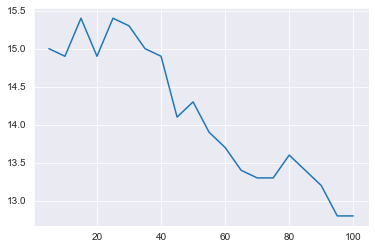

In [47]:
sns.lineplot(x=[i for i in range(5,101,5)] , y=p_k)

In [48]:
user_based_pk = list()
for k in [1,2,5,10]:
    new = ucf(best_n,k)
    is_in_top_k = 0
    for index, dropped in random_drops.items():
        if (dropped in new.loc[index].values):
            is_in_top_k += 1

    user_based_pk.append(is_in_top_k/(10*k))

TOP  1  ingredients based on  15  similar RECIPES
TOP  2  ingredients based on  15  similar RECIPES
TOP  5  ingredients based on  15  similar RECIPES
TOP  10  ingredients based on  15  similar RECIPES


In [50]:
user_based_pk

[15.4, 10.5, 6.2, 3.77]

Παρακάτω βλέπουμε, με βάση το καλύτερο Ν (=15) τα ποσοστά επιτυχίας για Κ=1,2,5,10 (υπάρχει τελικό για ολα στο τέλος)

Best Pair: N=15, K=1

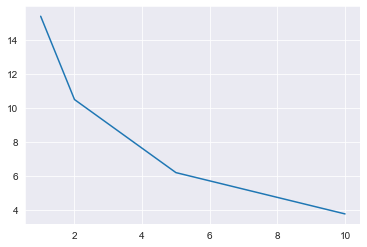

In [51]:
sns.lineplot(y=user_based_pk, x=[1,2,5,10])

In [52]:
teliko_ucf = ucf(best_n,1)

TOP  1  ingredients based on  15  similar RECIPES


In [56]:
geo['UCF'] = teliko_ucf

In [57]:
geo

,id,Dropped,UCF
7265,16224,pasta sauce,pasta sauce
2354,9275,chopped onion,salt
810,17129,cracked black pepper,garlic
437,32957,onions,salt
5048,21719,parmigiano reggiano cheese,parmigiano reggiano cheese
...,...,...,...
3356,9853,roasted red peppers,fresh parmesan cheese
7007,43190,kosher salt,salt
533,43975,lemon juice,olive oil
5791,48983,sugar,sugar


## Item-based Collaborative Filtering (ΙCF)
$$score(r,i) =\frac{\sum_{i' \epsilon B_{N}(i)} J(i,i')M[r,i']}{\sum_{i' \epsilon B_{N}(i)} J(i,i')}$$

Εκτελώντας τον αλγόριθμο icf() για Ν (παρόμοια υλικά) απο [1,100] (βήμα 5) και K=1 (#προτινώμενα υλικά για συνταγή) βρισκουμε ότι για N=5 (P@K=1) έχουμε το καλύτερο ποσόστο επιτυχίας (για τα υλικά που αφαιρέσαμε) με 2,7%.


<b>Αξίζει να σημειωθεί οτι το ποσοστό επιτυχίας εξαρτάται αρκετά απο το δείγμα R και τα τυχαία υλικά που αφαιρούμε, μιας και ο αλγόριθμος ΙCF για άλλα δείγματα φτάνει ως και 30% </b>

(Γενικά για P@1 , Ν[1,10])

In [60]:
%%time
J_ing = 1 - metrics.pairwise.pairwise_distances(np.array(M.T, dtype='bool' ),metric = 'jaccard') 
np.fill_diagonal(J_ing, 0)
print(J_ing)

[[0.         0.1        0.11111111 ... 0.         0.         0.        ]
 [0.1        0.         0.         ... 0.         0.         0.        ]
 [0.11111111 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.0057971  0.        ]
 [0.         0.         0.         ... 0.0057971  0.         0.00311526]
 [0.         0.         0.         ... 0.         0.00311526 0.        ]]
Wall time: 1min 13s


In [61]:
# Indices of similar ingredients in Descending order
order_ing = np.argsort(J_ing, axis=1)[:, ::-1]
order_ing

array([[ 978, 1050,  841, ..., 1944, 1943,    0],
       [ 978,    0, 1050, ..., 1945, 1944, 1464],
       [1820,  670,    0, ..., 1947, 1946, 1464],
       ...,
       [2453,  400, 2242, ..., 1927, 1926,    0],
       [2915,  530, 2144, ..., 1818, 1817,    0],
       [1767, 1154, 1078, ..., 1948, 1947,    0]], dtype=int64)

In [62]:
# Sorting in descending order
J_ing[:, ::-1].sort(axis=1)

In [63]:
r_no_id = R.copy()

In [64]:
r_no_id.drop(columns='id', inplace=True)
r_no_id.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,(14.5 oz.) diced tomatoes,1% low-fat buttermilk,1% low-fat cottage cheese,1% low-fat milk,2% low-fat cottage cheese,2% milk shredded mozzarella cheese,2% reduced-fat milk,...,yolk,yukon gold,yukon gold potatoes,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
7265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
def top_k_icf(top_N, top_K):
    result_array = np.empty((0,1000))
    
    for index,list_order in enumerate(order_ing[:, :top_N]):
        
        #Indice where r equals 1
        is_one = np.where(np.array(r_no_id.iloc[:,index]) == 1)

        jac_sum = J_ing[index,:top_N].sum()
        
        r = np.dot(J_ing[index,:top_N], np.array(r_no_id.T.iloc[list_order,:]))
        
        sc = r/jac_sum

        sc[is_one] = 0
        
        result_array = np.append(result_array, [sc], axis=0)

    ind_ing= np.argsort(result_array.T)[:,::-1]
    frame = pd.DataFrame(index=R.index, data=M.columns[ind_ing[:,:top_K]] ,
                       columns=['top{}'.format(i) for i in range(1, top_K+1)])
    return frame

In [66]:
def is_in_drops(data):
    is_in_top_k = 0
    for index, dropped in random_drops.items():
        if (dropped in data.loc[index].values):
            is_in_top_k += 1

    return (is_in_top_k/10)

In [67]:
%%time
ing_pk = list()
for n in range(5,101,5):
    new=top_k_icf(n,1)
    ing_pk.append(is_in_drops(new))
    

Wall time: 9min 6s


N=5 gia K=1

In [69]:
best_n = (ing_pk.index(max(ing_pk))*5)+5
print("Best N={} with p@K=1 {}".format(best_n,max(ing_pk)))

Best N=5 with p@K=1 2.7


Παρακάτω βλέπουμε οτι όσο αυξάνεται το Ν το ποσοστό επιτυχίας για P@K=1 μειώνεται

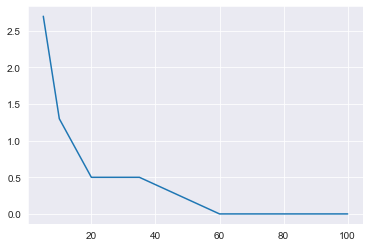

In [70]:
sns.lineplot(x=[i for i in range(5,101,5)] , y=ing_pk)

In [71]:
ing_based_pk = list()
for k in [1,2,5,10]:
    new = top_k_icf(best_n,k)
    is_in_top_k = 0
    for index, dropped in random_drops.items():
        if (dropped in new.loc[index].values):
            is_in_top_k += 1

    ing_based_pk.append(is_in_top_k/(10*k))

Με βάση το καλύτερο Ν(=5) βρίσκουμε οτι για K=1,2,5,10 το καλύτερο ποσοστό επιτυχίας (δηλ να βρούμε το υλικό που αφαιρέσαμε) ειναι για K=5 με ~3%

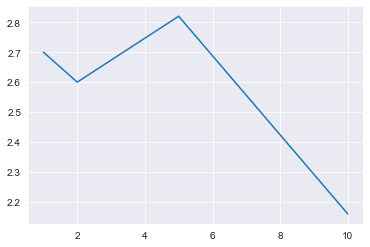

In [72]:
sns.lineplot(y=ing_based_pk, x=[1,2,5,10])

In [73]:
teliko_icf = top_k_icf(best_n,1)

In [75]:
geo['ICF'] = teliko_icf

In [76]:
geo.head()

,id,Dropped,UCF,ICF
7265,16224,pasta sauce,pasta sauce,white flour
2354,9275,chopped onion,salt,plum tomatoes
810,17129,cracked black pepper,garlic,bread rolls
437,32957,onions,salt,small shells
5048,21719,parmigiano reggiano cheese,parmigiano reggiano cheese,fresh basil


## Singular Value Decomposition (SVD)

$$M = U\Sigma V^{T}$$

𝑼∶ orthogonal matrix containing the top k left singular vectors of M.  
 
𝜮: diagonal matrix containing the top k singular values of M  

𝑽: orthogonal matrix containing the top k right singular vectors of M. 

Εκτελώντας τον αλγόριθμο svd() για Ν απο [1,100] (βήμα 5) και K=1, βρισκουμε ότι για N=5 (P@K=1) έχουμε το καλύτερο ποσόστο επιτυχίας (για τα υλικά που αφαιρέσαμε) με 7%.

In [77]:
import scipy.sparse.linalg as sp_linalg
import scipy.sparse as sp_sparse

In [78]:
def find_ones(data):
    indices_to_drop = dict()
    for i,r in data.iterrows():

        is_one=np.where(r[1:]==1)
        indices_to_drop.update({i:is_one})
        
    return indices_to_drop

In [79]:
indices_one = find_ones(R)

In [80]:
def to_zero(prediction):
    for i,r in indices_one.items():
        prediction[i,r] = 0
    return prediction

In [81]:
def svd(top_N, top_K):
    data = sp_sparse.csc_matrix(M, dtype=float)
    U,s,V = sp_linalg.svds(data, k=top_N)
    
    all_recipes_predicted_ingredients = np.dot(np.dot(U, np.diag(s)), V)
    
    all_recipes_predicted_ingredients = to_zero(all_recipes_predicted_ingredients)
    
    sample_r = all_recipes_predicted_ingredients[R.index]
    
    topK_indices = np.argsort(sample_r)[:,::-1]

    
    frame = pd.DataFrame(index=R.index,data= M.columns[topK_indices[:,:top_K]],
                         columns=['top{}'.format(i) for i in range(1, top_K+1)])
    return frame

In [82]:
%%time
precision_svd = list()
for n in range(5,101,5):
    new=svd(n,1)
    is_in_top_k = 0
    for index, dropped in random_drops.items():
        if (dropped in new.loc[index].values):
            is_in_top_k += 1

    precision_svd.append(is_in_top_k/10)

Wall time: 19.9 s


In [85]:
best_n = (precision_svd.index(max(precision_svd))*5)+5
print("Best N={} with p@K=1 {}".format(best_n,max(precision_svd)))

Best N=5 with p@K=1 7.0


In [87]:
svd_best_k = list()
for k in [1,2,5,10]:
    new = svd(best_n,k)
    is_in_top_k = 0
    for index, dropped in random_drops.items():
        if (dropped in new.loc[index].values):
            is_in_top_k += 1

    svd_best_k.append(is_in_top_k/(10*k))

Παρακάτω βλέπουμε οτι με βάση το καλύτερο Ν(=5) για Κ=1,2,5,10 το καλύτερο ποσοστό το έχουμε για Κ=1 (7%)

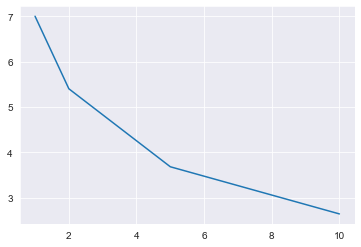

In [88]:
sns.lineplot(y=svd_best_k, x=[1,2,5,10])

In [92]:
teliko_svd = svd(5,1)

In [133]:
geo['SVD'] = teliko_svd

Με βάση τα καλύτερα Ν για κάθε αλγόριθμο:
- UCF N=15
- ICF N=5
- SVD N=5  
  
και Κ=1, παρατηρούμε οτι:

1. ο UCF έχει την μεγαλύτερη ακρίβεια να βρει το υλικό που αφαιρέσαμε με Κ=1 (~16%).  
2. μετά ο SVD με Κ=1 (~8%)  
3. και τελευταίος ο ICF με Κ=5 (~3%)

Text(0.5, 0, 'K')

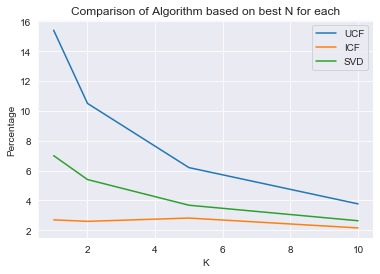

In [130]:

sns.lineplot(y=user_based_pk, x=[1,2,5,10])
sns.lineplot(y=ing_based_pk, x=[1,2,5,10])
sns.lineplot(y=svd_best_k, x=[1,2,5,10])

plt.legend(['UCF','ICF','SVD'])
plt.title("Comparison of Algorithm based on best N for each")
plt.ylabel("Percentage")
plt.xlabel("K")

In [134]:
geo.to_excel('check.xlsx')

<b>(Extra) Παρατηρήσεις:</b>  
- Στα περισσότερα δείγματα που εξετάστηκαν ο αλγόριθμος UCF ήταν σχεδόν πάντα ο καλύτερος.
- Το δείγμα που διαλέγουμε και τα υλικά που αφαιρούμε επηρέαζει την ακρίβεια.
- Μετά από τον χειρωνακτικό έλεγχο των αποτελεσμάτων των αλγορίθμων UCF,ICF,SVD για το δείγμα R το ποσοστό ακρίβειας διπλασιάζεται (κατα μέσο ορο) για όλους τους αλγορίθμους.